## Glassdoor Attrition Prediction Project


In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn import datasets, linear_model
from sklearn import model_selection, metrics, preprocessing
from sklearn.decomposition import PCA
from sklearn import tree
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.externals.six import StringIO
from IPython.display import Image
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
from sklearn.linear_model import Lasso
import seaborn as sn

### Import Data

In [2]:
raw_df = pd.read_csv('data.csv')

### Features

The Data set is composed of 45 features that are listed below.

In [3]:
print (raw_df.shape)
print(raw_df.columns)

(5550, 45)
Index([u'theSame', u'resumeId', u'rNum', u'leftEmployer', u'startDate',
       u'endDate', u'jobLength_old', u'employerName', u'employeesTotalNum',
       u'empAgeAtExit', u'yearFounded', u'gdSectorName', u'metro', u'jobTitle',
       u'avgSalary', u'ratingOverall', u'ratingCeo',
       u'ratingRecommendToFriend', u'ratingBusinessOutlook',
       u'ratingCareerOpportunities', u'ratingCompensationAndBenefits',
       u'ratingCultureAndValues', u'ratingWorkLifeBalance',
       u'ratingSeniorManagement', u'salaryIncrease', u'newMinusOldSalary',
       u'startDate_new', u'endDate_new', u'jobLength_new', u'employerName_new',
       u'employeesTotalNum_new', u'yearFounded_new', u'gdSectorName_new',
       u'metro_new', u'jobTitle_new', u'avgSalary_new', u'ratingOverall_new',
       u'ratingCeo_new', u'ratingRecommendToFriend_new',
       u'ratingBusinessOutlook_new', u'ratingCareerOpportunities_new',
       u'ratingCompensationAndBenefits_new', u'ratingCultureAndValues_new',
     

### Data Preparation

Features Dropped: 
One attribute 'thesame' have the same value in all the fields.So this column will not add any value to the study, so it was dropped. 

Another Fearure "resume ID" was dropped as it will not return any value.


In [4]:
raw_df.drop(columns=['theSame'],inplace=True)
raw_df.drop(columns=['resumeId'],inplace=True)
raw_df.drop(columns=['startDate'],inplace=True)
raw_df.drop(columns=['endDate'],inplace=True)
raw_df.drop(columns=['startDate_new'],inplace=True)
raw_df.drop(columns=['endDate_new'],inplace=True)
raw_df.drop(columns=['jobTitle'],inplace=True)
raw_df.drop(columns=['employerName'],inplace=True)
raw_df.drop(columns=['jobTitle_new'],inplace=True)
raw_df.drop(columns=['employerName_new'],inplace=True)

In [10]:
# Features after dropping the unused  ones.
print (raw_df.shape)
raw_df

(5550, 35)


,rNum,leftEmployer,jobLength_old,employeesTotalNum,empAgeAtExit,yearFounded,gdSectorName,metro,avgSalary,ratingOverall,...,avgSalary_new,ratingOverall_new,ratingCeo_new,ratingRecommendToFriend_new,ratingBusinessOutlook_new,ratingCareerOpportunities_new,ratingCompensationAndBenefits_new,ratingCultureAndValues_new,ratingWorkLifeBalance_new,ratingSeniorManagement_new
0,1,1,13,22500,111.0,1903.0,Manufacturing,Milwaukee,30480.00000,3.82,...,61976.00000,3.43,0.76,0.67,0.29,3.70,3.27,3.29,2.82,2.82
1,1,0,5,8500,144.0,1868.0,Education,Detroit,16840.00000,3.71,...,21656.04000,3.69,0.82,0.84,0.27,3.03,3.59,3.25,3.80,3.04
2,1,0,15,14500,132.0,1882.0,Finance,Chicago,29895.21778,2.82,...,34918.18095,2.82,0.49,0.43,0.36,2.77,3.17,3.05,2.94,2.63
3,1,1,9,1662,122.0,1891.0,Education,Chicago,62891.55000,3.61,...,22726.42769,3.51,0.61,0.73,0.24,3.31,3.36,3.36,3.86,2.93
4,1,0,36,7500,65.0,1949.0,Education,Los Angeles,23451.42857,3.90,...,26640.98889,4.07,1.00,0.92,0.19,2.75,3.18,4.25,4.58,3.60
5,1,0,9,9607,227.0,1787.0,Education,Pittsburgh,28337.71429,3.90,...,28295.40556,3.78,0.88,0.80,0.35,3.34,3.61,3.72,3.87,3.28
6,1,0,8,72500,112.0,1901.0,Retail,Houston,20301.43973,3.68,...,32416.12208,3.68,0.99,0.68,0.45,4.14,4.30,3.95,2.97,3.48
7,1,1,19,118500,79.0,1934.0,Travel & Tourism,Chicago,24200.00000,2.49,...,24024.61538,2.81,1.00,0.46,1.00,2.56,3.30,5.00,3.84,2.53
8,1,0,9,11260,18.0,1994.0,Information Technology,San Jose,60274.37333,3.31,...,69069.85100,3.31,0.91,0.62,0.37,3.28,3.80,3.64,4.01,2.38
9,1,1,6,53600,14.0,1998.0,Information Technology,San Francisco,97375.36124,4.53,...,97429.35415,3.50,0.61,0.72,0.22,3.40,4.02,2.79,3.80,3.13


In [5]:
raw_df.dtypes

rNum                                   int64
leftEmployer                           int64
jobLength_old                          int64
employeesTotalNum                      int64
empAgeAtExit                         float64
yearFounded                          float64
gdSectorName                          object
metro                                 object
avgSalary                            float64
ratingOverall                        float64
ratingCeo                            float64
ratingRecommendToFriend              float64
ratingBusinessOutlook                float64
ratingCareerOpportunities            float64
ratingCompensationAndBenefits        float64
ratingCultureAndValues               float64
ratingWorkLifeBalance                float64
ratingSeniorManagement               float64
salaryIncrease                         int64
newMinusOldSalary                    float64
jobLength_new                          int64
employeesTotalNum_new                  int64
yearFounde

#### Changing Date columns from Type Obj to Numeric 

In [61]:
#raw_df['startDate'] = pd.to_numeric(df['startDate'], errors='coerce')
#raw_df['endDate'] = pd.to_numeric(df['endDate'], errors='coerce')
#raw_df['startDate_new'] = pd.to_numeric(df['startDate_new'], errors='coerce')
#raw_df['endDate_new'] = pd.to_numeric(df['endDate_new'], errors='coerce')
#raw_df.dtypes

In [6]:
print("Maximum Number of null cells:")
print(max(raw_df.isnull().sum()))

print(raw_df.isnull().sum())

Maximum Number of null cells:
332
rNum                                   0
leftEmployer                           0
jobLength_old                          0
employeesTotalNum                      0
empAgeAtExit                         308
yearFounded                          308
gdSectorName                           0
metro                                  0
avgSalary                              0
ratingOverall                          0
ratingCeo                              0
ratingRecommendToFriend                0
ratingBusinessOutlook                  0
ratingCareerOpportunities              0
ratingCompensationAndBenefits          0
ratingCultureAndValues                 0
ratingWorkLifeBalance                  0
ratingSeniorManagement                 0
salaryIncrease                         0
newMinusOldSalary                      0
jobLength_new                          0
employeesTotalNum_new                  0
yearFounded_new                      332
gdSectorName_new       

In [7]:
# delete the rows that have blank cells 
clean_raw_df=raw_df.dropna(axis='rows')
print(clean_raw_df.shape)

(5006, 35)


In [10]:
#indexNames = clean_raw_df[  (clean_raw_df['empAgeAtExit'] >90) |(clean_raw_df['empAgeAtExit'] < 15) ]
#print (indexNames.shape)
#clean_raw_df.drop(indexNames , inplace=True)

## Descriptive Statitics

In [8]:
print(clean_raw_df.describe())

              rNum  leftEmployer  jobLength_old  employeesTotalNum  \
count  5006.000000   5006.000000    5006.000000       5.006000e+03   
mean      1.126448      0.731123      15.015382       1.283551e+05   
std       0.396024      0.443420      12.142410       3.141788e+05   
min       1.000000      0.000000       0.000000       1.000000e+00   
25%       1.000000      0.000000       5.000000       5.500000e+03   
50%       1.000000      1.000000      12.000000       2.500000e+04   
75%       1.000000      1.000000      22.000000       1.500000e+05   
max       6.000000      1.000000      88.000000       2.200000e+06   

       empAgeAtExit  yearFounded      avgSalary  ratingOverall    ratingCeo  \
count   5006.000000  5006.000000    5006.000000    5006.000000  5006.000000   
mean      74.205753  1939.499201   52260.214680       3.267583     0.705893   
std       58.039399    58.101110   32641.228933       0.549186     0.243783   
min       -3.000000  1625.000000   15140.000000      

In [9]:
clean_raw_df.groupby('gdSectorName')['avgSalary_new'].describe()

,count,mean,std,min,25%,50%,75%,max
gdSectorName,,,,,,,,
Accounting & Legal,93.0,73063.391238,37871.051663,15468.600000,41577.368737,68518.714286,94411.974314,261677.150000
Aerospace & Defense,32.0,76021.296146,24408.547049,30884.000000,62447.000000,78647.945122,89974.281700,135938.247354
Agriculture & Forestry,1.0,65555.248158,NaN,65555.248158,65555.248158,65555.248158,65555.248158,65555.248158
"Arts, Entertainment & Recreation",12.0,51639.887731,36230.013904,16984.102564,29195.097386,39129.740162,68372.749237,133717.453333
Biotech & Pharmaceuticals,59.0,74274.374428,35922.047506,26367.200000,49687.500000,64488.955975,88332.987500,177800.000000
Business Services,332.0,60506.819657,32308.202748,15760.000000,33400.464076,54744.088653,81024.825786,167239.078235
"Construction, Repair & Maintenance",16.0,60671.141640,23273.232408,27133.333333,36550.356066,58144.706538,83389.719336,99492.360000
Consumer Services,15.0,46968.644878,22356.242788,18513.333333,27731.572401,43000.000000,60710.525263,89717.880000
Education,655.0,40551.456063,24200.883742,15240.000000,24978.360235,31403.664933,47044.950000,201506.666667


## Visualization 

Before building any models , I wanted to visualize the data. The following section includes charts that gives further visual representation for the data set.
The charts included below are:
1. Bar Chart
2. Heat Map
3. Pair Plot
4. Histogram
5. Scatter Plot

In [10]:
def col_count_plot(col):
    data = raw_df[col]
    names = data.value_counts().index
    values = data.value_counts().values
    pos = range(len(values))
    plt.bar(pos, values)
    plt.xticks(pos, names)
    plt.ylabel('Count')
    plt.title(col)
    plt.show()

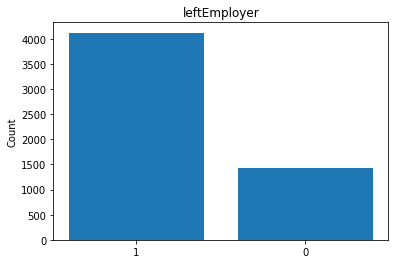

In [12]:
#Bar Chart
col_count_plot('leftEmployer')

#### Correlation Matrix for Quantitative Attributes: Heat Map

There is a strong correlation  between the the 9 ratings over the old and new working places. 

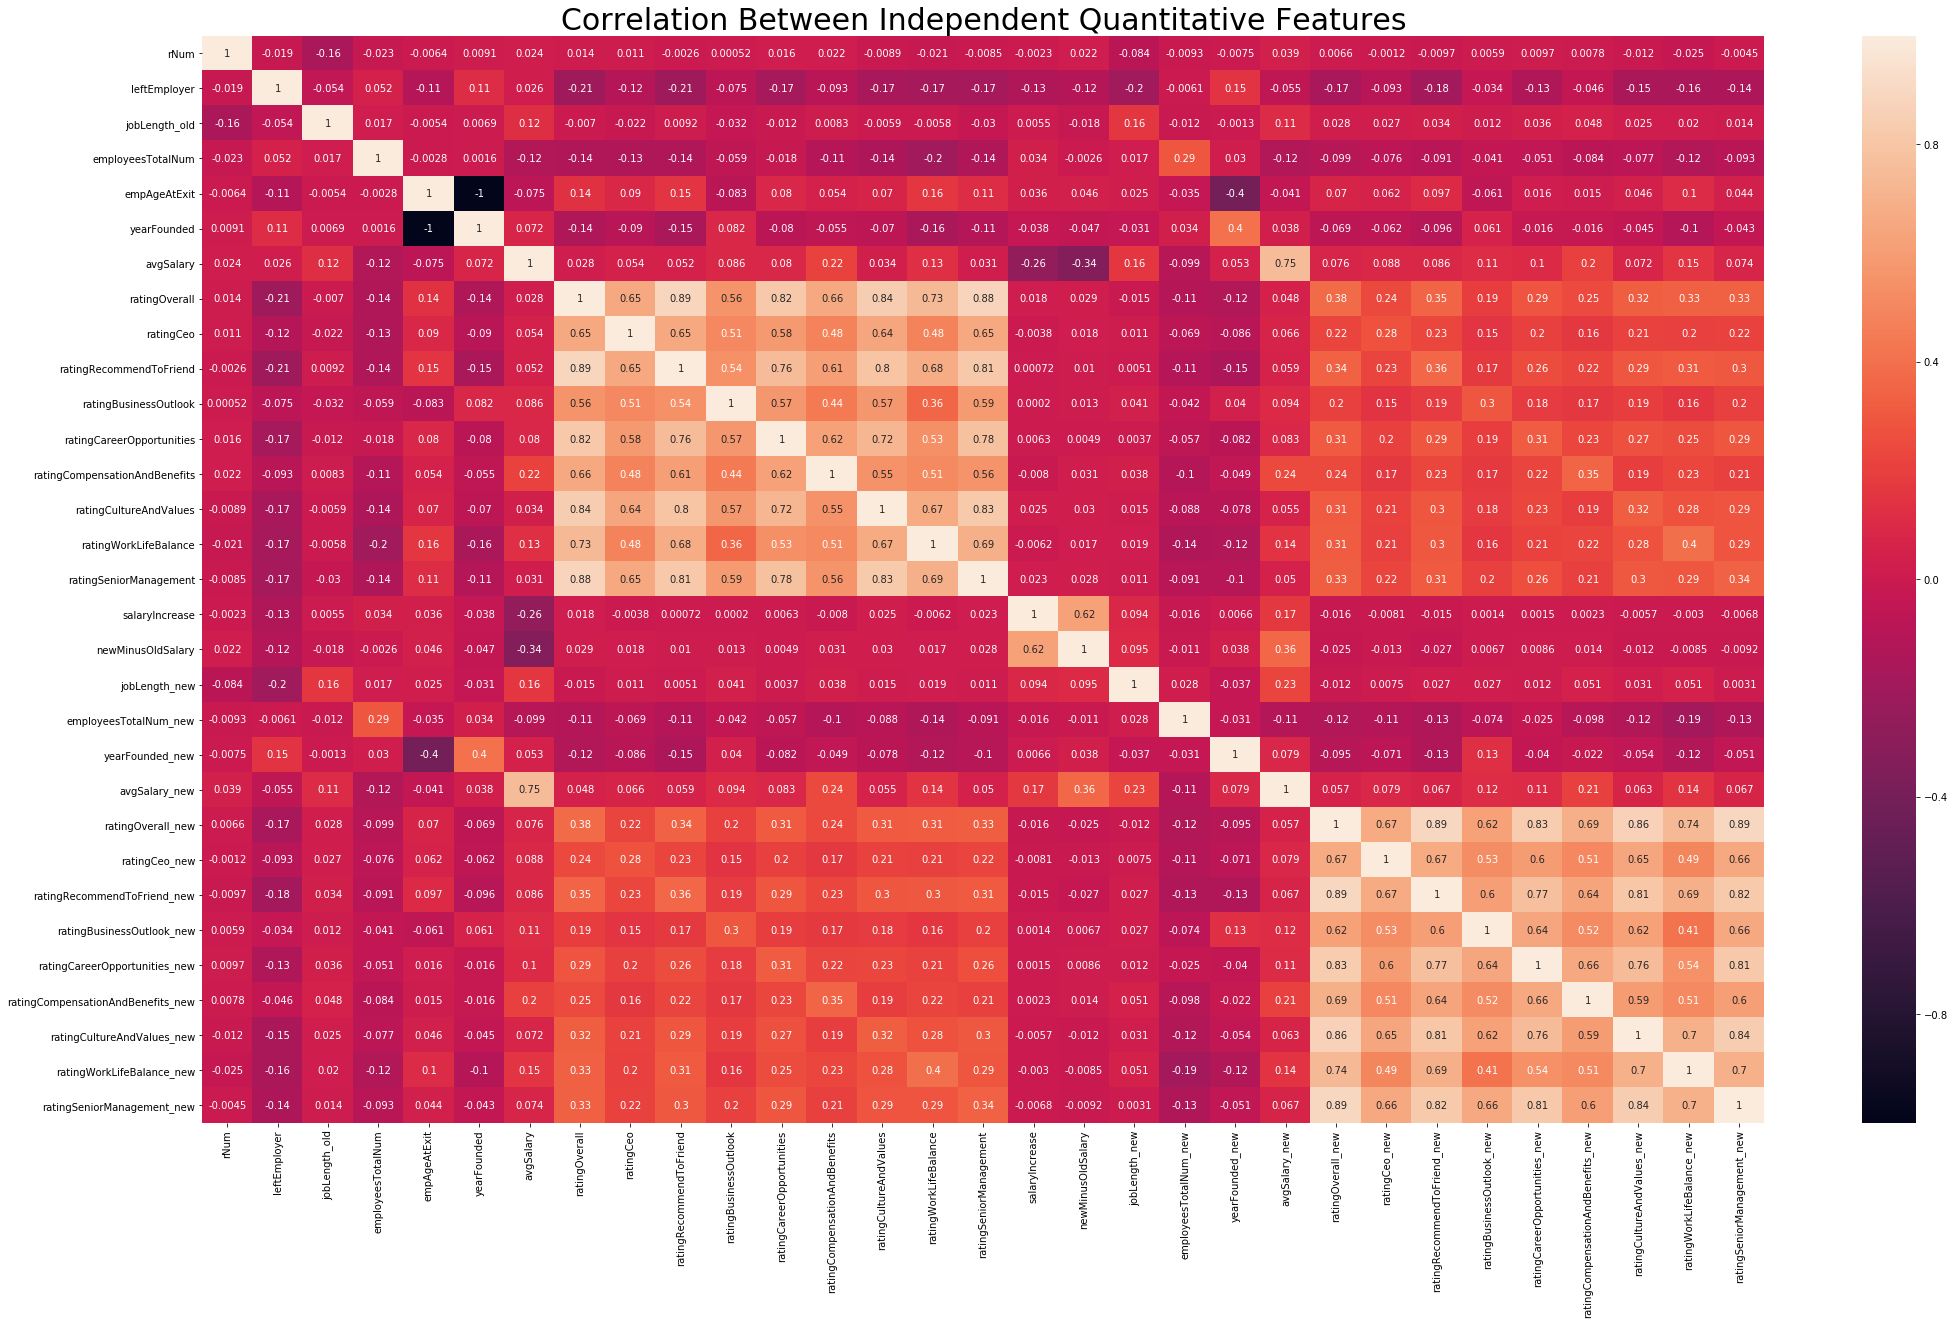

In [13]:
# Correlation matrix 
plt.figure(figsize = (35,20))        

# Size of the figure
sns.heatmap(raw_df.corr(),annot = True)
plt.title("Correlation Between Independent Quantitative Features",fontsize=30)
plt.show()

#### Pair Plot Chart

The pair plot shows the distribution of the employees who left and not versus the average annual income. 
Based on the pair_plots below, he area under the curve for the employees who take monthly income of $2500 or less were more likely to leave in this data set.





C:\Users\nelrayes\AppData\Local\Continuum\anaconda2\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Attrition Vs. Average Monthly salary')

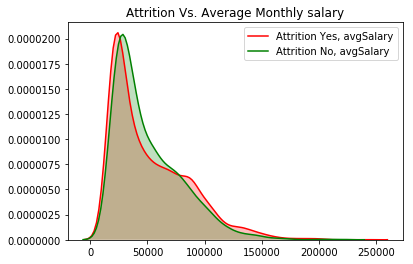

In [14]:
attrition_yes= raw_df[raw_df['leftEmployer']==1]
attritio_no = raw_df[raw_df['leftEmployer']==0]

sns.kdeplot(attrition_yes['avgSalary'], label="Attrition Yes, avgSalary",shade=True, color="r")
sns.kdeplot(attritio_no['avgSalary'], label="Attrition No, avgSalary",shade=True,color="g")
plt.title('Attrition Vs. Average Monthly salary')

Text(0.5,1,'Attrition Vs. Overall Rating')

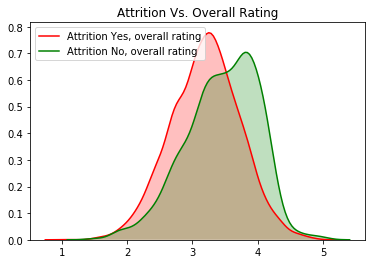

In [15]:

attrition_yes= raw_df[raw_df['leftEmployer']==1]
attritio_no = raw_df[raw_df['leftEmployer']==0]

sns.kdeplot(attrition_yes['ratingOverall'], label="Attrition Yes, overall rating",shade=True, color="r")
sns.kdeplot(attritio_no['ratingOverall'], label="Attrition No, overall rating",shade=True,color="g")
plt.title('Attrition Vs. Overall Rating')

Text(0.5,1,'Attrition Vs. rating Career Opportunities')

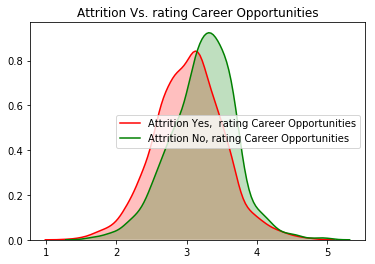

In [16]:

attrition_yes= raw_df[raw_df['leftEmployer']==1]
attritio_no = raw_df[raw_df['leftEmployer']==0]

sns.kdeplot(attrition_yes['ratingCareerOpportunities'], label="Attrition Yes,  rating Career Opportunities",shade=True, color="r")
sns.kdeplot(attritio_no['ratingCareerOpportunities'], label="Attrition No, rating Career Opportunities",shade=True,color="g")
plt.title('Attrition Vs. rating Career Opportunities')

Text(0.5,1,'Attrition Vs. Rating TOP Management')

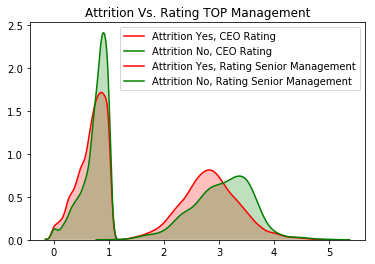

In [17]:

attrition_yes= raw_df[raw_df['leftEmployer']==1]
attritio_no = raw_df[raw_df['leftEmployer']==0]

sns.kdeplot(attrition_yes['ratingCeo'], label="Attrition Yes, CEO Rating",shade=True, color="r")
sns.kdeplot(attritio_no['ratingCeo'], label="Attrition No, CEO Rating",shade=True,color="g")
plt.title('Attrition Vs. CEO Rating')


attrition_yes= raw_df[raw_df['leftEmployer']==1]
attritio_no = raw_df[raw_df['leftEmployer']==0]

sns.kdeplot(attrition_yes['ratingSeniorManagement'], label="Attrition Yes, Rating Senior Management",shade=True, color="r")
sns.kdeplot(attritio_no['ratingSeniorManagement'], label="Attrition No, Rating Senior Management",shade=True,color="g")
plt.title('Attrition Vs. Rating TOP Management')

####  Histogram:


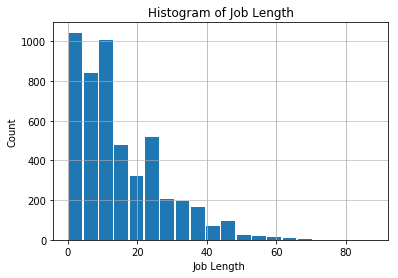

In [19]:
clean_raw_df.iloc[:,2].hist(grid=True, bins=20, rwidth=0.9)
plt.title('Histogram of Job Length')
plt.xlabel('Job Length ')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.75)
plt.show()

#### Scatter Plot: 

Text(0,0.5,'Overall Rating')

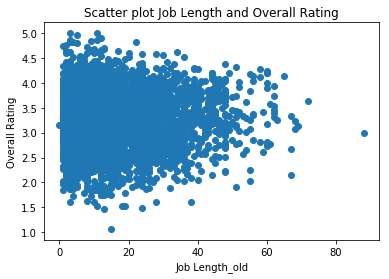

In [98]:
plt.scatter(clean_raw_df['jobLength_old'],clean_raw_df['ratingOverall'])
plt.title('Scatter plot Job Length and Overall Rating')
plt.xlabel('Job Length_old')
plt.ylabel('Overall Rating')

# New: 3 charts

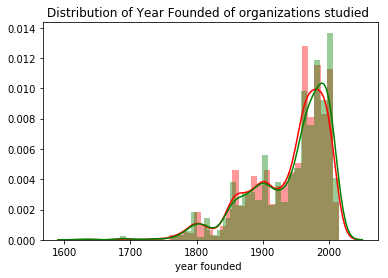

In [62]:
sns.distplot(clean_raw_df['yearFounded'], color="r", label= "Old")
sns.distplot(clean_raw_df['yearFounded_new'], color="g",label= "New")
plt.xlabel('year founded ')
plt.title('Distribution of Year Founded of organizations studied ')
plt.show() 

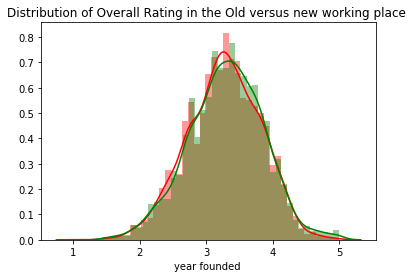

In [61]:
sns.distplot(clean_raw_df['ratingOverall'], color="r", label= "Old")
sns.distplot(clean_raw_df['ratingOverall_new'], color="g",label= "New")
plt.xlabel('year founded ')
plt.title('Distribution of Overall Rating in the Old versus new working place ')
plt.show() 

The box plot shows comparison related to compensation and salary. The Top 2 box plots show the distribution of Average salary and the opinion (rating) of the employees who left and stayed regarding the compensation and benefits.

In the first chart to the left, it shows the distribution of 4th Quartile is larger and wider for the emplyees who left.


The bottom 2 charts show a comparison between the overall rating for the emplyees who left and stayed, Versus the emplyees who had salary increase or not.

The distribution of overall rating for the emplyees who had raise or not is almost the same.

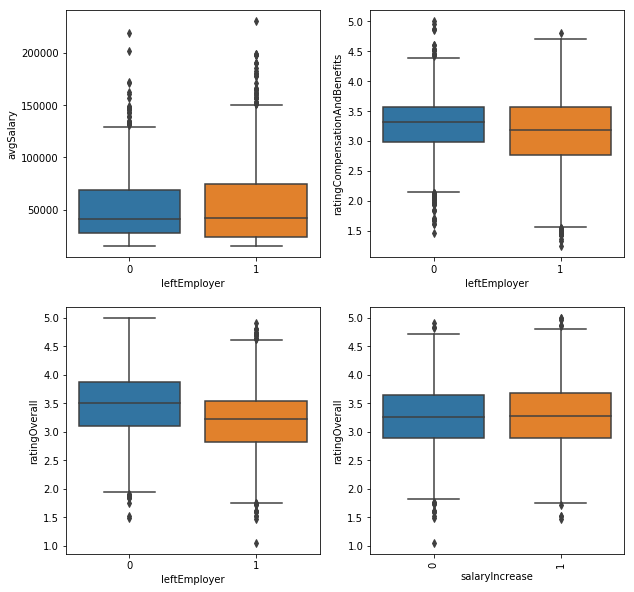

In [60]:
fig,ax = plt.subplots(2,2, figsize=(10,10))                       
sns.boxplot(clean_raw_df['leftEmployer'],clean_raw_df['avgSalary'], ax = ax[0,0]) 
sns.boxplot(clean_raw_df['leftEmployer'], clean_raw_df['ratingCompensationAndBenefits'], ax = ax[0,1])  
plt.xticks( rotation=90)


sns.boxplot(clean_raw_df['leftEmployer'], clean_raw_df['ratingOverall'], ax = ax[1,0]) 
sns.boxplot(clean_raw_df['salaryIncrease'], clean_raw_df['ratingOverall'], ax = ax[1,1]) 

plt.show() 

## Handling Categorical Data & Splitting Target
Two methods were used: Pandas Get Dummies and Label Encoder.


### Pandas Get Dummies:

There are 8 Categorical Features:
'Employer Name', 'Sector Name','State = Metro','Job Title','New Employer Name','New Sector Name'.

After using get dummies, the attributes are split into classes of 0s and 1s based on the uniques values in each attributes. 



In [20]:
# Get Dummies

df = pd.get_dummies(clean_raw_df, columns=['gdSectorName','metro','gdSectorName_new','metro_new'])

names =[col for col in df.columns if col not in ['leftEmployer'] ]

X_dummies = df[names]
y_dummies = df['leftEmployer']

print ('X : Independent Features')
print X_dummies.shape
print ('Target Variable : Left Employer')
print y_dummies.shape

print X_dummies.head
print y_dummies




X : Independent Features
(5006, 260)
Target Variable : Left Employer
(5006L,)
<bound method DataFrame.head of       rNum  jobLength_old  employeesTotalNum  empAgeAtExit  yearFounded  \
0        1             13              22500         111.0       1903.0   
1        1              5               8500         144.0       1868.0   
2        1             15              14500         132.0       1882.0   
3        1              9               1662         122.0       1891.0   
4        1             36               7500          65.0       1949.0   
5        1              9               9607         227.0       1787.0   
6        1              8              72500         112.0       1901.0   
7        1             19             118500          79.0       1934.0   
8        1              9              11260          18.0       1994.0   
9        1              6              53600          14.0       1998.0   
10       1             35             176187          31.0       

# Normalize the Data & Splitting

In [21]:
def do_split (all_x,all_y,random_state=None):
    X_train, X_test, y_train, y_test = model_selection.train_test_split(all_x,all_y, test_size=0.2, random_state=random_state)
    scaler = preprocessing.MinMaxScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test


# Models:

### Multiple Regression,  Logistic Regression,  Lasso Regression,  Ridge Regression,  PCA, SVM

used the same seed, to avoid having different rows for every run

## Multiple Regression:

The objective of this section is to examine the correlation between the different features and the target variable (Attrition).

In [99]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg= do_split (X_dummies,y_dummies,random_state=113)

regr=linear_model.LinearRegression()
regr.fit(X_train_reg, y_train_reg)
y_predict=regr.predict(X_test_reg)

print('r score training',regr.score(X_train_reg, y_train_reg))
print('r score testing',regr.score(X_test_reg, y_test_reg))



C:\Users\nelrayes\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


('r score training', 0.2650980419178153)
('r score testing', -1.1725236650177875e+20)


# Logistic Regression

In [39]:
X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic= do_split (X_dummies,y_dummies,random_state=113)

# without CV
model = LogisticRegression()
model.fit(X_train_logistic,y_train_logistic)
y_pred_logistic = model.predict(X_test_logistic)

resultLogistic= pd.DataFrame({'name':names,'Coefficient':model.coef_[0]}) 


print("Confusion Matrix")
print (metrics.confusion_matrix(y_test_logistic, y_pred_logistic))
#            Predict No     Predict Yes
#Actual No
#Actual Yes

print('r score training',model.score(X_train_logistic, y_train_logistic))
print('r score testing',model.score(X_test_logistic, y_test_logistic))

print('Accuracy and Precision score')

print metrics.accuracy_score(y_test_logistic,y_pred_logistic)
print metrics.average_precision_score(y_test_logistic,y_pred_logistic)

print resultLogistic
print('model intercept',model.intercept_ )


Confusion Matrix
[[105 162]
 [ 51 684]]
('r score training', 0.8034465534465535)
('r score testing', 0.7874251497005988)
Accuracy and Precision score
0.7874251497005988
0.8033081037230791
<bound method DataFrame.head of      Coefficient                               name
0      -1.307450                               rNum
1      -0.472993                      jobLength_old
2       0.222982                  employeesTotalNum
3       0.651702                       empAgeAtExit
4       0.542492                        yearFounded
5       0.384382                          avgSalary
6      -0.348635                      ratingOverall
7      -0.016957                          ratingCeo
8      -0.215501            ratingRecommendToFriend
9       0.145129              ratingBusinessOutlook
10     -1.082692          ratingCareerOpportunities
11      0.077096      ratingCompensationAndBenefits
12     -0.408180             ratingCultureAndValues
13      0.655021              ratingWorkLifeBalance


C:\Users\nelrayes\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


## Logistic Regression with Cross Validation (10 Folds)


In [47]:

X_train_logisticCV, X_test_logisticCV, y_train_logisticCV, y_test_logisticCV= do_split (X_dummies,y_dummies,random_state=113)

model_log = LogisticRegressionCV(cv=10,max_iter=1000)
model_log.fit(X_train_logisticCV,y_train_logisticCV)
y_pred_logisticCV = model_log.predict(X_test_logisticCV)

resultLogisticCV= pd.DataFrame({'name':names,'features logistic':model_log.coef_[0]}) 

print("Confusion Matrix")
print (metrics.confusion_matrix(y_test_logisticCV, y_pred_logisticCV))
#            Predict No     Predict Yes
#Actual No
#Actual Yes

print('r score training',model_log.score(X_train_logisticCV, y_train_logisticCV))
print('r score testing',model_log.score(X_test_logisticCV, y_test_logisticCV))

print('Accuracy and Precision score')

print metrics.accuracy_score(y_test_logisticCV,y_pred_logisticCV)
print metrics.average_precision_score(y_test_logisticCV,y_pred_logisticCV)

print resultLogisticCV
print('model intercept',model.intercept_ )


C:\Users\nelrayes\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Confusion Matrix
[[103 164]
 [ 44 691]]
('r score training', 0.8014485514485514)
('r score testing', 0.7924151696606786)
Accuracy and Precision score
0.7924151696606786
0.8037180395147169
     features logistic                               name
0            -0.925118                               rNum
1            -0.443332                      jobLength_old
2             0.124028                  employeesTotalNum
3             0.020542                       empAgeAtExit
4            -0.010552                        yearFounded
5             0.068946                          avgSalary
6            -0.263113                      ratingOverall
7            -0.043831                          ratingCeo
8            -0.233840            ratingRecommendToFriend
9             0.111244              ratingBusinessOutlook
10           -0.826215          ratingCareerOpportunities
11            0.050658      ratingCompensationAndBenefits
12           -0.382390             ratingCultureAndValues


# Logistic With Lasso and Ridge

 Lasso Regression will be use to exclude some of the features that is causing a noise and doesnot help in predicting the employees who are leaving. The objective is to find the features that would help maximize the coeffient of determination.

In [73]:
X_train_Lasso, X_test_Lasso, y_train_Lasso, y_test_Lasso= do_split (X_dummies,y_dummies,random_state=113)
X_train_Ridge, X_test_Ridge, y_train_Ridge, y_test_Ridge= do_split (X_dummies,y_dummies,random_state=113)

# lasso with small constant for strong regularization C =0.1
model_n0 = LogisticRegression(penalty='l1', C=0.1)
model_n0.fit(X_train_Lasso,y_train_Lasso)
y_pred_n0 = model_n0.predict(X_test_Lasso)

# lasso with high constant for weak regularization C =1
model_n1 = LogisticRegression(penalty='l1', C=1)
model_n1.fit(X_train_Lasso,y_train_Lasso)
y_pred_n1 = model_n1.predict(X_test_Lasso)

# lasso with high constant for weak regularization C =100
model_n4 = LogisticRegression(penalty='l1', C=100)
model_n4.fit(X_train_Lasso,y_train_Lasso)
y_pred_n4 = model_n4.predict(X_test_Lasso)



# ridge with small constant for strong regularization c=0.1
model_n2 = LogisticRegression(penalty='l2', C=0.1)
model_n2.fit(X_train_Ridge,y_train_Ridge)
y_pred_n2 = model_n2.predict(X_test_Ridge)

# ridge with high constant for weak regularization c=1
model_n3 = LogisticRegression(penalty='l2', C=1)
model_n3.fit(X_train_Ridge,y_train_Ridge)
y_pred_n3 = model_n3.predict(X_test_Ridge)

# ridge with high constant for weak regularization c=100
model_n5 = LogisticRegression(penalty='l2', C=100)
model_n5.fit(X_train_Ridge,y_train_Ridge)
y_pred_n5 = model_n5.predict(X_test_Ridge)

result_Lasso_Ridge= pd.DataFrame({'name':names,' Logistic Lasso, C=0.1':model_n0.coef_[0],
                         ' Logistic Lasso C=1':model_n1.coef_[0],' Logistic Ridge C=0.1 ':model_n2.coef_[0],
                         ' Logistic Lasso C=100':model_n4.coef_[0], ' Logistic Ridge, c=1':model_n3.coef_[0],
                         ' Logistic Ridge, c=100':model_n5.coef_[0] })


result_Lasso_Ridge

C:\Users\nelrayes\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\nelrayes\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,Logistic Lasso C=1,Logistic Lasso C=100,"Logistic Lasso, C=0.1",Logistic Ridge C=0.1,"Logistic Ridge, c=1","Logistic Ridge, c=100",name
0,-1.390042,-1.729919,0.000000,-0.381359,-1.307450,-1.727215,rNum
1,-0.457090,-0.495099,0.000000,-0.307591,-0.472993,-0.496235,jobLength_old
2,0.177535,0.302204,0.000000,0.051975,0.222982,0.302650,employeesTotalNum
3,0.057844,0.887605,0.000000,0.268103,0.651702,0.698404,empAgeAtExit
4,0.000000,0.656421,0.000000,0.492159,0.542492,0.469464,yearFounded
5,0.492089,1.414127,0.000000,0.012311,0.384382,0.621348,avgSalary
6,0.000000,-0.748442,0.000000,-0.088241,-0.348635,-0.755723,ratingOverall
7,0.000000,-0.005529,0.000000,-0.045173,-0.016957,-0.005691,ratingCeo
8,-0.112892,-0.153860,-0.101150,-0.223700,-0.215501,-0.153616,ratingRecommendToFriend
9,0.064938,0.164347,0.000000,0.022479,0.145129,0.165366,ratingBusinessOutlook


In [53]:
#            Predict No     Predict Yes
#Actual No
#Actual Yes

print('Logistic Regression CV =10')
print(metrics.confusion_matrix(y_test_logisticCV, y_pred_logisticCV))
print('Accuracy Logistic Regression')
print metrics.accuracy_score(y_test_logisticCV, y_pred_logisticCV)
print("\n")

print('Logistic Lasso with Strong Regularization C=0.1')
print(metrics.confusion_matrix(y_test_Lasso, y_pred_n0))
print('Accuracy Lasso C=0.1')
print metrics.accuracy_score(y_test_Lasso, y_pred_n0)
print("\n")

print('Logistic Lasso with weak Regularization C=1')
print(metrics.confusion_matrix(y_test_Lasso, y_pred_n1))
print('Accuracy Lasso C=1')
print metrics.accuracy_score(y_test_Lasso, y_pred_n1)
print("\n")

print('Logistic lasso with weak Regularization C=100')
print(metrics.confusion_matrix(y_test_Ridge, y_pred_n4))
print('Accuracy Lasso C=100')
print metrics.accuracy_score(y_test_Lasso, y_pred_n4)
print("\n")

print('Logistic Ridge with Strong Regularization C=0.1')
print(metrics.confusion_matrix(y_test_Ridge, y_pred_n2))
print('Accuracy Ridge C=0.1')
print metrics.accuracy_score(y_test_Lasso, y_pred_n2)
print("\n")


print('Logistic Ridge with weak Regularization C=1')
print(metrics.confusion_matrix(y_test_Ridge, y_pred_n3))
print('Accuracy Ridge C=1')
print metrics.accuracy_score(y_test_Lasso, y_pred_n3)
print("\n")


print('Logistic Ridge with weak Regularization C=100')
print(metrics.confusion_matrix(y_test_Ridge, y_pred_n5))
print('Accuracy Ridge C=100')
print metrics.accuracy_score(y_test_Lasso, y_pred_n5)
print("\n")


Logistic Regression CV =5
[[103 164]
 [ 44 691]]
Accuracy Logistic Regression
0.7924151696606786


Logistic Lasso with Strong Regularization C=0.1
[[ 94 173]
 [ 39 696]]
Accuracy Lasso C=0.1
0.7884231536926147


Logistic Lasso with weak Regularization C=1
[[107 160]
 [ 52 683]]
Accuracy Lasso C=1
0.7884231536926147


Logistic lasso with weak Regularization C=100
[[110 157]
 [ 50 685]]
Accuracy Lasso C=100
0.7934131736526946


Logistic Ridge with Strong Regularization C=0.1
[[ 96 171]
 [ 34 701]]
Accuracy Ridge C=0.1
0.7954091816367266


Logistic Ridge with weak Regularization C=1
[[105 162]
 [ 51 684]]
Accuracy Ridge C=1
0.7874251497005988


Logistic Ridge with weak Regularization C=100
[[110 157]
 [ 49 686]]
Accuracy Ridge C=100
0.7944111776447106




# SVM 

In [88]:
from sklearn import svm

X_train_SVM, X_test_SVM, y_train_SVM, y_test_SVM= do_split (X_dummies,y_dummies,random_state=113)

print('SVM using kernel=rbf, Mean Accuracy')
svm_model = svm.SVC(gamma='scale',kernel= 'rbf')
svm_model.fit(X_train_SVM,y_train_SVM)
y_pred_SVM=svm_model.predict(X_test_SVM)
print (svm_model.score(X_test_SVM,y_test_SVM))
print(metrics.confusion_matrix(y_test_SVM, y_pred_SVM))
print("\n")

print('SVM using kernel=linear,Mean Accuracy')
svm_model1 = svm.SVC(gamma='scale',kernel= 'linear')
svm_model1.fit(X_train_SVM,y_train_SVM)
y_pred_SVM1=svm_model1.predict(X_test_SVM)
print (svm_model1.score(X_test_SVM,y_test_SVM))
print(metrics.confusion_matrix(y_test_SVM, y_pred_SVM1))
print("\n")

print('SVM using kernel=poly,Mean Accuracy')
svm_model2 = svm.SVC(gamma='scale',kernel= 'poly')
svm_model2.fit(X_train_SVM,y_train_SVM)
y_pred_SVM2=svm_model2.predict(X_test_SVM)
print (svm_model2.score(X_test_SVM,y_test_SVM))
print(metrics.confusion_matrix(y_test_SVM, y_pred_SVM2))
print("\n")

C:\Users\nelrayes\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


SVM using kernel=rbf, Mean Accuracy
0.7714570858283433
[[ 86 181]
 [ 48 687]]


SVM using kernel=linear,Mean Accuracy
0.7684630738522954
[[ 90 177]
 [ 55 680]]


SVM using kernel=poly,Mean Accuracy
0.7734530938123753
[[ 43 224]
 [  3 732]]




# PCA

In [83]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca= do_split (X_dummies,y_dummies,random_state=113)

# 2 = number of dimenssion
pca = PCA(n_components=2)
pca.fit_transform(X_train_pca)


resultdf= pd.DataFrame({'name':names,'PCA Components':pca.components_[0]}) 
print('Score')
print (pca.score(X_test_pca,y_test_pca))

print(resultdf)


Score
176.44212068357575
     PCA Components                               name
0          0.001731                               rNum
1         -0.005369                      jobLength_old
2          0.033550                  employeesTotalNum
3         -0.009559                       empAgeAtExit
4          0.009473                        yearFounded
5         -0.042128                          avgSalary
6         -0.109392                      ratingOverall
7         -0.131244                          ratingCeo
8         -0.155693            ratingRecommendToFriend
9         -0.105329              ratingBusinessOutlook
10        -0.095830          ratingCareerOpportunities
11        -0.101444      ratingCompensationAndBenefits
12        -0.104850             ratingCultureAndValues
13        -0.107050              ratingWorkLifeBalance
14        -0.103617             ratingSeniorManagement
15         0.010318                     salaryIncrease
16         0.000477                  new

C:\Users\nelrayes\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


# Models Performance and Evaluation:

In [90]:
# Metric compare
print ('Log Loss')


print('Logistic Regression ')
print(metrics.log_loss(y_test_logistic, y_pred_logistic))

print('Logistic Regression CV =10')
print(metrics.log_loss(y_test_logisticCV, y_pred_logisticCV))

print('Logistic Lasso with Strong Regularization C=0.1')
print(metrics.log_loss(y_test_Lasso, y_pred_n0))

print('Logistic Lasso with weak Regularization C=1')
print(metrics.log_loss(y_test_Lasso, y_pred_n1))

print('Logistic Lasso with weak Regularization C=100')
print(metrics.log_loss(y_test_Lasso, y_pred_n4))

print('Logistic Ridge with Strong Regularization C=0.1')
print(metrics.log_loss(y_test_Ridge, y_pred_n2))

print('Logistic Ridge with weak Regularization C=1')
print(metrics.log_loss(y_test_Ridge, y_pred_n3))

print('Logistic Ridge with weak Regularization C=1')
print(metrics.log_loss(y_test_Ridge, y_pred_n5))


print('SVC , Kernel=  rbf')
print(metrics.log_loss(y_test_SVM, y_pred_SVM))

print('SVC , Kernel= linear')
print(metrics.log_loss(y_test_SVM, y_pred_SVM1))

print('SVC , Kernel=  poly')
print(metrics.log_loss(y_test_SVM, y_pred_SVM2))


Log Loss
Logistic Regression 
7.342204497903859
Logistic Regression CV =5
7.169856910299375
Logistic Lasso with Strong Regularization C=0.1
7.307743439198093
Logistic Lasso with weak Regularization C=1
7.307733065179536
Logistic Lasso with weak Regularization C=100
7.100911650846449
Logistic Ridge with Strong Regularization C=0.1
7.066452986144964
Logistic Ridge with weak Regularization C=1
7.342204497903859
Logistic Ridge with weak Regularization C=1
7.100911650846449
SVC , Kernel=  rbf
7.893737047474463
SVC , Kernel= linear
7.997143365633157
SVC , Kernel=  poly
7.824831688092903


In [92]:
# Metric compare
print ('ROC- AUC')


print('Logistic Regression ')
print(metrics.roc_auc_score(y_test_logistic, y_pred_logistic))

print('Logistic Regression CV =10')
print(metrics.roc_auc_score(y_test_logisticCV, y_pred_logisticCV))

print('Logistic Lasso with Strong Regularization C=0.1')
print(metrics.roc_auc_score(y_test_Lasso, y_pred_n0))

print('Logistic Lasso with weak Regularization C=1')
print(metrics.roc_auc_score(y_test_Lasso, y_pred_n1))

print('Logistic Lasso with weak Regularization C=100')
print(metrics.roc_auc_score(y_test_Lasso, y_pred_n4))

print('Logistic Ridge with Strong Regularization C=0.1')
print(metrics.roc_auc_score(y_test_Ridge, y_pred_n2))

print('Logistic Ridge with weak Regularization C=1')
print(metrics.roc_auc_score(y_test_Ridge, y_pred_n3))

print('Logistic Ridge with weak Regularization C=100')
print(metrics.roc_auc_score(y_test_Ridge, y_pred_n5))

print('SVC , Kernel=  rbf')
print(metrics.roc_auc_score(y_test_SVM, y_pred_SVM))

print('SVC , Kernel= linear')
print(metrics.roc_auc_score(y_test_SVM, y_pred_SVM1))

print('SVC , Kernel=  poly')
print(metrics.roc_auc_score(y_test_SVM, y_pred_SVM2))


ROC- AUC
Logistic Regression 
0.6619353359321256
Logistic Regression CV =5
0.6629519223419705
Logistic Lasso with Strong Regularization C=0.1
0.6494993503019185
Logistic Lasso with weak Regularization C=1
0.6650003821753421
Logistic Lasso with weak Regularization C=100
0.6726591760299625
Logistic Ridge with Strong Regularization C=0.1
0.6566460291981961
Logistic Ridge with weak Regularization C=1
0.6619353359321256
Logistic Ridge with weak Regularization C=100
0.6726591760299625
SVC , Kernel=  rbf
0.628395627914087
SVC , Kernel= linear
0.6311243598563021
SVC , Kernel=  poly
0.5784835282427577


# Findings and Conclusion: (Metrices Comparison)

In [97]:
print ('\033[1m' + 'Mean absolute error  '+ '\033[0m')

print('Logistic Regression ')
print(metrics.mean_absolute_error(y_test_logistic, y_pred_logistic))

print('Logistic Regression CV =10')
print(metrics.mean_absolute_error(y_test_logisticCV, y_pred_logisticCV))

print('Logistic Lasso with Strong Regularization C=0.1')
print(metrics.mean_absolute_error(y_test_Lasso, y_pred_n0))

print('Logistic Lasso with weak Regularization C=1')
print(metrics.mean_absolute_error(y_test_Lasso, y_pred_n1))

print('Logistic Lasso with weak Regularization C=100')
print(metrics.mean_absolute_error(y_test_Lasso, y_pred_n4))

print('Logistic Ridge with Strong Regularization C=0.1')
print(metrics.mean_absolute_error(y_test_Ridge, y_pred_n2))

print('Logistic Ridge with weak Regularization C=1')
print(metrics.mean_absolute_error(y_test_Ridge, y_pred_n3))

print('Logistic Ridge with weak Regularization C=100')
print(metrics.mean_absolute_error(y_test_Ridge, y_pred_n5))

print('SVC , Kernel=  rbf')
print(metrics.mean_absolute_error(y_test_SVM, y_pred_SVM))

print('SVC , Kernel= linear')
print(metrics.mean_absolute_error(y_test_SVM, y_pred_SVM1))

print('SVC , Kernel=  poly')
print(metrics.mean_absolute_error(y_test_SVM, y_pred_SVM2))

print("\n")


print ('\033[1m' +'Explained variance '+ '\033[0m')

print('Logistic Regression ')
print(metrics.explained_variance_score(y_test_logistic, y_pred_logistic))

print('Logistic Regression CV =5')
print(metrics.explained_variance_score(y_test_logisticCV, y_pred_logisticCV))

print('Logistic Lasso with Strong Regularization C=0.1')
print(metrics.explained_variance_score(y_test_Lasso, y_pred_n0))

print('Logistic Lasso with weak Regularization C=1')
print(metrics.explained_variance_score(y_test_Lasso, y_pred_n1))

print('Logistic Lasso with weak Regularization C=100')
print(metrics.explained_variance_score(y_test_Lasso, y_pred_n4))

print('Logistic Ridge with Strong Regularization C=0.1')
print(metrics.explained_variance_score(y_test_Ridge, y_pred_n2))

print('Logistic Ridge with weak Regularization C=1')
print(metrics.explained_variance_score(y_test_Ridge, y_pred_n3))

print('Logistic Ridge with weak Regularization C=100')
print(metrics.explained_variance_score(y_test_Ridge, y_pred_n5))

print('SVC , Kernel=  rbf')
print(metrics.explained_variance_score(y_test_SVM, y_pred_SVM))

print('SVC , Kernel= linear')
print(metrics.explained_variance_score(y_test_SVM, y_pred_SVM1))

print('SVC , Kernel=  poly')
print (metrics.explained_variance_score(y_test_SVM, y_pred_SVM2))

print("\n")

Mean absolute error  
Logistic Regression 
0.2125748502994012
Logistic Regression CV =5
0.20758483033932135
Logistic Lasso with Strong Regularization C=0.1
0.21157684630738524
Logistic Lasso with weak Regularization C=1
0.21157684630738524
Logistic Lasso with weak Regularization C=100
0.2055888223552894
Logistic Ridge with Strong Regularization C=0.1
0.20459081836327345
Logistic Ridge with weak Regularization C=1
0.2125748502994012
Logistic Ridge with weak Regularization C=100
0.2055888223552894
SVC , Kernel=  rbf
0.22854291417165667
SVC , Kernel= linear
0.2315369261477046
SVC , Kernel=  poly
0.22654690618762474


Explained variance 
Logistic Regression 
-0.024764962164641302
Logistic Regression CV =5
0.011358251165634603
Logistic Lasso with Strong Regularization C=0.1
0.009055007770898515
Logistic Lasso with weak Regularization C=1
-0.023006955591225342
Logistic Lasso with weak Regularization C=100
0.007628219827256588
Logistic Ridge with Strong Regularization C=0.1
0.0489388264669160